### Hedge example

In [69]:
suppressMessages(library('dplyr'))
suppressMessages(library('quantmod'))
suppressMessages(library('repr'))
suppressMessages(library('xlsx'))
suppressMessages(library('derivmkts'))
suppressMessages(library('ggplot2'))
suppressMessages(library('moments'))
suppressMessages(library('bizdays'))
suppressMessages(library('lubridate'))
# This changes the size of plots
options(repr.plot.width = 5.5, repr.plot.height =4)

In [70]:
TSLA_OPTIONS = xlsx::read.xlsx('Data/TSLA_OPTIONS.xlsx', sheetName = "Sheet1")

TSLA_STOCK = xlsx::read.xlsx('Data/TSLA_STOCK.xlsx', sheetName = "Sheet1")

n_row = dim(TSLA_STOCK)[1]
print(paste(c("Total Number of Rows = ", n_row), collapse = ''))

n_col = dim(TSLA_STOCK)[2]
print(paste(c("Total Number of Columns = ", n_col), collapse = ''))

# convert date to "Date" variable
TSLA_STOCK$Date = as.Date(TSLA_STOCK$Date, format="%Y-%m-%d")

[1] "Total Number of Rows = 717"
[1] "Total Number of Columns = 7"


In [71]:
min(TSLA_STOCK$Date)

[1] "2019-01-02"

In [72]:
cal <-  create.calendar(name="mycal", weekdays=c("saturday", "sunday"))
start_date = min(TSLA_STOCK$Date); start_date
end_date = max(TSLA_STOCK$Date); end_date
x = as.numeric(bizdays::bizdays(start_date, end_date, cal = cal))

[1] "2019-01-02"

[1] "2021-11-03"

In [73]:
x / 252

[1] 2.936508

In [74]:
TSLA_STOCK[(n_row-10):n_row,]

,Date,TSLA.Open,TSLA.High,TSLA.Low,TSLA.Close,TSLA.Volume,TSLA.Adjusted
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
707,2021-10-20,865.35,869.49,857.38,865.80,14032100,865.80
708,2021-10-21,856.00,900.00,855.50,894.00,31481500,894.00
709,2021-10-22,895.50,910.00,890.96,909.68,22880800,909.68
710,2021-10-25,950.53,1045.02,944.20,1024.86,62852100,1024.86
711,2021-10-26,1024.69,1094.94,1001.44,1018.43,62415000,1018.43
712,2021-10-27,1039.66,1070.88,1030.78,1037.86,38526500,1037.86
713,2021-10-28,1068.31,1081.00,1054.20,1077.04,27213200,1077.04
714,2021-10-29,1081.86,1115.21,1073.21,1114.00,29918400,1114.00
715,2021-11-01,1145.00,1209.75,1118.66,1208.59,56048700,1208.59


In [75]:
Time_to_maturity = NULL
DELTA = NULL
row_index = NULL

DELTA_DELTA = NULL

v = .64946084322086    # Volatility
r = .00045             # risk-free rate
d = 0                  # dividend yeild
nsteps = 50            # number of time steps .... Anything beyond 50 could be extreme.
k = 870                # Strike Price


for(i in 1:n_row){
#for(i in 1:10){
    date_i = TSLA_STOCK$Date[i]
    delta_t = as.numeric(bizdays::bizdays(date_i, end_date, cal = cal))
    delta_t = delta_t / 252
    
    # find the time to maturity
    Time_to_maturity[i] = delta_t
    
    # find the current stock price
    stock_i = TSLA_STOCK$TSLA.Close[i]
    
    df = derivmkts::binomopt(stock_i, k , v , r , delta_t , d , nsteps,
                         putopt=FALSE,   
                         american=TRUE,   
                         returntrees=TRUE)

    delta = as.numeric(df$greeks[1])
    DELTA[i] = delta
    
    row_index[i] = i
    
    if(i==1){
        delta_delta = 0
    }
    else{
        delta_delta = DELTA[i] - DELTA[i-1]
    }
    DELTA_DELTA[i] = delta_delta
}



TSLA_STOCK$row_index = row_index
TSLA_STOCK$Delta = DELTA
TSLA_STOCK$Change_in_Delta = DELTA_DELTA


In [76]:
TSLA_STOCK[1:3,]

,Date,TSLA.Open,TSLA.High,TSLA.Low,TSLA.Close,TSLA.Volume,TSLA.Adjusted,row_index,Delta,Change_in_Delta
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,2019-01-02,61.22,63.026,59.760,62.024,58293000,62.024,1,0.03279202,0.000000000
2,2019-01-03,61.40,61.880,59.476,60.072,34826000,60.072,2,0.03072367,-0.002068346
3,2019-01-04,61.20,63.600,60.546,63.538,36970500,63.538,3,0.03394623,0.003222556


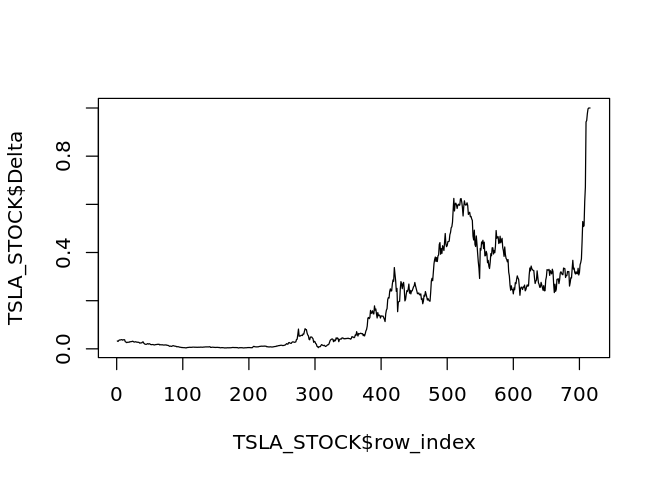

In [67]:
plot(TSLA_STOCK$row_index, 
     TSLA_STOCK$Delta, 
     type = 'l')

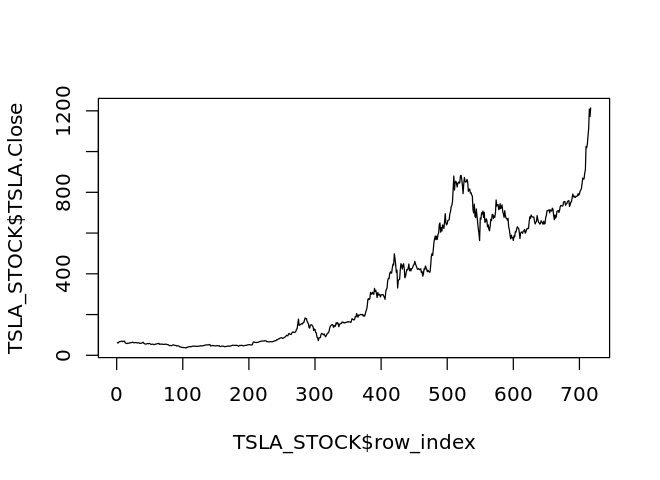

In [68]:
plot(TSLA_STOCK$row_index, 
     TSLA_STOCK$TSLA.Close, 
     type = 'l')

---

In [4]:
df = derivmkts::binomopt(s, k , v , r , t , d , nsteps,
                         putopt=FALSE,    # <----- putopt = FALSE (price for call option) 
                         american=TRUE,   # <----- american = TRUE (price for american option). This should always be TRUE
                         returntrees=TRUE)# <----- returntrees = TRUE (returns the option price). This should always be TRUE


In [7]:
df$price

price 
34.16901